In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#◢ Set up the environment


In [ ]:
!unzip photo_restoration.zip -d photo_restoration

In [ ]:
# pull the syncBN repo
%cd photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

# download the landmark detection model
%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

# download the pretrained model
%cd Face_Enhancement/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Face_Enhancement/checkpoints.zip
!unzip checkpoints.zip
%cd ../

%cd Global/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Global/checkpoints.zip
!unzip checkpoints.zip
%cd ../

In [ ]:
! pip install -r requirements.txt

#◢ Run the code

In [ ]:
%cd /content/photo_restoration/
import shutil
shutil.rmtree('output')

/content/photo_restoration


### Restore photos (normal mode)

In [ ]:
%cd /content/photo_restoration/
input_folder = "test_images/old"
output_folder = "output"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
os.mkdir(output_path)

!python run.py --input_folder /content/photo_restoration/test_images/old --output_folder /content/photo_restoration/output/ --GPU 0

/content/photo_restoration
Running Stage 1: Overall restoration
Mapping: You are using the mapping model without global restoration.
Skipping non-file .ipynb_checkpoints
Now you are processing I.png
Now you are processing f.png
Now you are processing g.png
Now you are processing h.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 3 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


In [ ]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]
    
    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

In [ ]:
filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

.ipynb_checkpoints


IsADirectoryError: ignored

### Restore the photos with scratches

In [ ]:
!rm -rf /content/photo_restoration/output/*
!python run.py --input_folder /content/photo_restoration/test_images/old_w_scratch/ --output_folder /content/photo_restoration/output/ --GPU 0 --with_scratch

Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/photo_restoration/test_images/old_w_scratch
processing a.png
processing b.png
processing c.png
processing d.png
You are using NL + Res
Now you are processing a.png
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
2
1
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 5 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Tot

a.png


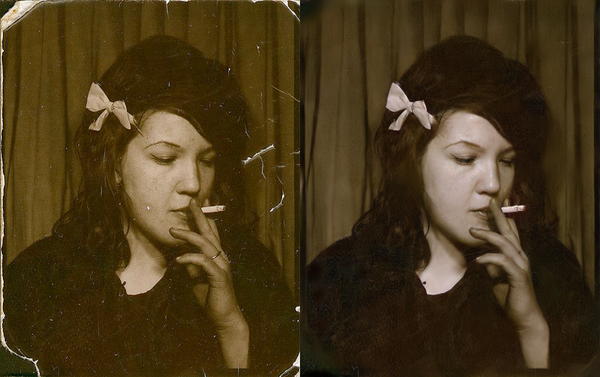

b.png


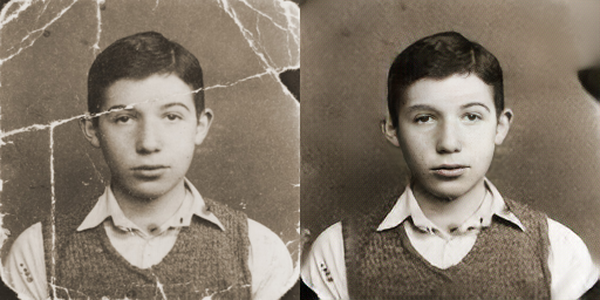

c.png


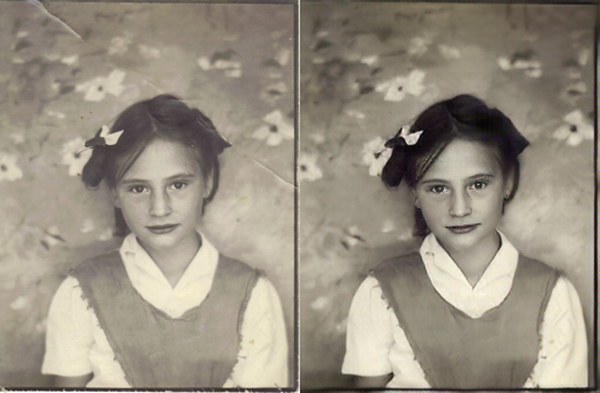

d.png


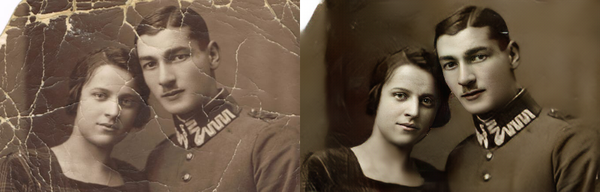

In [ ]:
input_folder = "test_images/old_w_scratch"
output_folder = "output"
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)

filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))